<a href="https://colab.research.google.com/github/the-ultimate-krol/winter_school/blob/main/2-TextAnalysis-Normalization-NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - Text analysis

## Environment

We need `spacy` for text analysis, `scikit-learn` for calculations and `matplotlip` for charts and plots. We also need to download the `en_core_web_sm` spacy's language model we will work on.

The `datasets` is a module to easily load datasets. They come from the [HuggingFace](https://huggingface.co/docs/datasets/v1.8.0/loading_datasets.html).

In [1]:
!pip install spacy scikit-learn matplotlib datasets
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 24.2 MB/s eta 0:00:00
2023-06-30 15:52:45.332032: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 15:52:47.451332: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 78.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.

## Tokenization

In the first lab you found out how to tokenize your text into tensors that can be further used to word predictions. If the tokenization result is not meant to be used as the neural network input directly, we can use much more friendly tokenizaion from the `spacy` package. For example, we may want to split text into word tokens.

First, you need to import and initialize the `spacy` module.

In [2]:
import spacy

nlp = spacy.load('en_core_web_sm')

Then, you can tokenize the text into sentences.

In [3]:
text = """The second lab will be exciting, too!
There are many knowledge for you to gain like part of speech and
named entities recognition or stemming. It will be fun!"""

tokens = nlp(text)
[token.text for token in tokens]



['The',
 'second',
 'lab',
 'will',
 'be',
 'exciting',
 ',',
 'too',
 '!',
 '\n',
 'There',
 'are',
 'many',
 'knowledge',
 'for',
 'you',
 'to',
 'gain',
 'like',
 'part',
 'of',
 'speech',
 'and',
 '\n',
 'named',
 'entities',
 'recognition',
 'or',
 'stemming',
 '.',
 'It',
 'will',
 'be',
 'fun',
 '!']

Or sentences:

In [4]:
[sentence.text for sentence in tokens.sents]

['The second lab will be exciting, too!\n',
 'There are many knowledge for you to gain like part of speech and\nnamed entities recognition or stemming.',
 'It will be fun!']

### ⭐ Task for you ⭐

It may seem that tokenization is just spliting the text by spaces or dots. But its smarter than that! Try to tokenize the following text into words.

```
We have been to U.K. before we got to the very special country, i.e. Poland.
```

In [6]:
tokens2 = nlp("We have been to U.K. before we got to the very special country, i.e. Poland.")
[token.text for token in tokens2]

['We',
 'have',
 'been',
 'to',
 'U.K.',
 'before',
 'we',
 'got',
 'to',
 'the',
 'very',
 'special',
 'country',
 ',',
 'i.e.',
 'Poland',
 '.']

## Part of speech detection

You can use the `spacy` module to fetch information about part of speech (POS) of every token. We may use the `tokens` list initialized in the previous step.

In [7]:
[(token.text, token.pos_) for token in tokens]

[('The', 'DET'),
 ('second', 'ADJ'),
 ('lab', 'NOUN'),
 ('will', 'AUX'),
 ('be', 'AUX'),
 ('exciting', 'ADJ'),
 (',', 'PUNCT'),
 ('too', 'ADV'),
 ('!', 'PUNCT'),
 ('\n', 'SPACE'),
 ('There', 'PRON'),
 ('are', 'VERB'),
 ('many', 'ADJ'),
 ('knowledge', 'NOUN'),
 ('for', 'SCONJ'),
 ('you', 'PRON'),
 ('to', 'PART'),
 ('gain', 'VERB'),
 ('like', 'ADP'),
 ('part', 'NOUN'),
 ('of', 'ADP'),
 ('speech', 'NOUN'),
 ('and', 'CCONJ'),
 ('\n', 'SPACE'),
 ('named', 'VERB'),
 ('entities', 'NOUN'),
 ('recognition', 'NOUN'),
 ('or', 'CCONJ'),
 ('stemming', 'NOUN'),
 ('.', 'PUNCT'),
 ('It', 'PRON'),
 ('will', 'AUX'),
 ('be', 'AUX'),
 ('fun', 'ADJ'),
 ('!', 'PUNCT')]

### ⭐ Task for you ⭐

**Now** go ahead and count how many different POS tags are there in the given text! We want to know how many verbs, adjectives, pronouns, etc. are there in the text. Extra bonus for a chart 📊 😀

defaultdict(<class 'int'>, {'DET': 1, 'ADJ': 4, 'NOUN': 7, 'AUX': 4, 'PUNCT': 4, 'ADV': 1, 'SPACE': 2, 'PRON': 3, 'VERB': 3, 'SCONJ': 1, 'PART': 1, 'ADP': 2, 'CCONJ': 2})


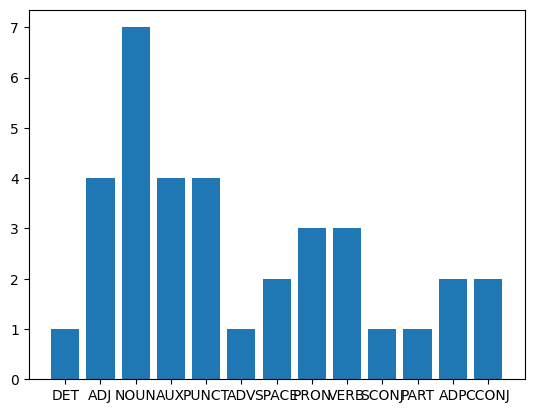

In [8]:
from collections import defaultdict

pos_quantities = defaultdict(int)
for token in tokens:
  pos_quantities[token.pos_] += 1
print(pos_quantities)

import matplotlib.pyplot as plt

plt.bar(list(pos_quantities.keys()), list(pos_quantities.values()))
plt.show()


## Lemmatization

If you want to count how many certain word has been mentioned in the text, it is very useful to take all of the words to their base forms. This process is called as a *lemmatization*. The text processed with spacy already contains lemmas for every token. We will use this technique further in the lab.

In [9]:
[(token.text, token.lemma_) for token in tokens]

[('The', 'the'),
 ('second', 'second'),
 ('lab', 'lab'),
 ('will', 'will'),
 ('be', 'be'),
 ('exciting', 'exciting'),
 (',', ','),
 ('too', 'too'),
 ('!', '!'),
 ('\n', '\n'),
 ('There', 'there'),
 ('are', 'be'),
 ('many', 'many'),
 ('knowledge', 'knowledge'),
 ('for', 'for'),
 ('you', 'you'),
 ('to', 'to'),
 ('gain', 'gain'),
 ('like', 'like'),
 ('part', 'part'),
 ('of', 'of'),
 ('speech', 'speech'),
 ('and', 'and'),
 ('\n', '\n'),
 ('named', 'name'),
 ('entities', 'entity'),
 ('recognition', 'recognition'),
 ('or', 'or'),
 ('stemming', 'stemming'),
 ('.', '.'),
 ('It', 'it'),
 ('will', 'will'),
 ('be', 'be'),
 ('fun', 'fun'),
 ('!', '!')]

### ⭐ Task for you ⭐

Find lemmas for the following words:

* entities
* was
* mice
* cacti
* octopi

Are they lemmatized correctly with `spacy`?

In [10]:
interesting_lemmas = nlp("entities was mice cacti octopi")
[(token.text, token.lemma_) for token in interesting_lemmas]

[('entities', 'entity'),
 ('was', 'be'),
 ('mice', 'mice'),
 ('cacti', 'cacti'),
 ('octopi', 'octopi')]

## Named entity recognition

Processing the text with `spacy` also results in recognizing named entities, i.e. **balblabla**.

### Basics

In [11]:
ner_result = nlp("""Questions are swirling around $30M nomination of Andrea Riseborough to  "Oscar" at 30th January 2023 in U.S.""")
[(e.text, e.label_, e.start_char, e.end_char) for e in ner_result.ents]

[('around $30M', 'MONEY', 23, 34),
 ('Andrea Riseborough', 'PERSON', 49, 67),
 ('Oscar', 'WORK_OF_ART', 73, 78),
 ('30th January 2023', 'DATE', 83, 100),
 ('U.S.', 'GPE', 104, 108)]

If you wonder what the certain entity label means, you can ask `spacy` for an explanation.

In [12]:
spacy.explain('GPE')

'Countries, cities, states'

#### ⭐ Task for you ⭐

Try to come up with a text that will contain an entity of `WORK_OF_ART` type.

In [18]:
text_with_work_of_art = nlp("""I saw "Mona Lisa" during my stay in Paris.""")
[(e.text, e.label_, e.start_char, e.end_char) for e in text_with_work_of_art.ents]


[('Paris', 'GPE', 36, 41)]

### Visualization

You can use the `displacy` module of `spacy` to visualize the NER result. It will be much easier to analyze the text.

In [19]:
spacy.displacy.render(ner_result, style="ent", jupyter=True)

You can also display only specific entity types for better text understanding. Read the docs for the `displacy.render` function to find out more options you can configure here.

In [20]:
spacy.displacy.render(ner_result, style="ent", jupyter=True, options={"ents": ["PERSON", "DATE"]})

#### ⭐ Task for you ⭐

Try to analyze some longer text with `spacy` and visualize the NER result with `displacy`. Use some artice found on the web.

Then, count how many times each entity type has been detected in the text and display some stats. Extra bonus for a chart 📊 😀

In [21]:


longer_text = """
Eating out seems to have been as popular 5,000 years ago as it is today, with archaeologists in Iraq uncovering an ancient tavern dating back to 2,700 BCE.
Researchers working in the ancient city of Lagash discovered that the pub, hidden just 19 inches below the surface, was split into an open-air dining area and a room containing benches, an oven, ancient food remains and even a 5,000-year-old fridge.
They initially found themselves in the open courtyard space, an area that was difficult to excavate, being "open and exposed to the outdoors," Reed Goodman, an archaeologist from the University of Pennsylvania, told CNN.
After returning to the mysterious courtyard a few months later, in fall 2022, field director Sara Pizzimenti, from the University of Pisa, broadened the trench.
The team then discovered the industrial-sized oven, a moisture-wicking ancient "fridge," to keep food cool, and dozens of conical bowls, many containing fish remains, revealing the purpose of the courtyard to be an outdoor dining area.
"""

longer_text_ner = nlp(longer_text)
spacy.displacy.render(longer_text_ner, style="ent", jupyter=True)



## Detecting text similarity

### Bag of words

Let's say we have three texts.

> The quick brown fox jumps over the lazy dog.

> The dog kept barking over the night.

> A lazy fisherman with his dog met a fox last night.

How much they are similar to each other? Can we say they talking about similar topics?

A very idiomatic way of finding this out is a technique called *bag of words*. Its based on the calculation of the frequency of words apearing in the all texts, selecting the most popular ones and then representing the text as a list of integers containing the number of appearances of these words.

Example better than a lecture!

We will use the `sklearn` module to calculate the text metrics. The `CountVectorizer` class does all of the calculations for us. The `max_features=5` parameter tells the vectorizer we want to select at most 5 the most popular tokens from all of the texts.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "The quick brown fox jumps over the lazy dog.",
    "The dog kept barking very loud barking and barking again over the night.",
    "A lazy fisherman with his dog met a fox last night.",
]

count_vector = CountVectorizer(max_features=5)
data_count = count_vector.fit_transform(texts)
data_count.toarray()

array([[0, 1, 1, 1, 2],
       [3, 1, 0, 1, 2],
       [0, 1, 1, 0, 0]])

Wooow! What does it even mean? Let's see the tokens that were chosen to describe the texts.

In [23]:
count_vector.get_feature_names_out()

array(['barking', 'dog', 'fox', 'over', 'the'], dtype=object)

Ok, so the chosen tokens are

```
['dog', 'fox', 'lazy', 'night', 'the']
```

and the texts representation after creating the bag of words is:

```
array([[1, 1, 1, 0, 2],
       [1, 0, 0, 1, 2],
       [1, 1, 1, 1, 0]])
```

It means that:
* the word `dog` appered in all of the texts once
* the word `fox` and `lazy` appeared once in the first and the third text
* the word `night` appeared once in the second and the third text
* the word `the` appeared in the first and the second text, twice in both of them

Now you should understand the *bag of words* text representation. We can say that the more similar the vectors are, the more similar the texts are, too. We can obviously calculate the distance between them and even visualize them on a chart, but we need a few more exercies and obviously - more data!

#### ⭐ Task for you ⭐

Try to experiment with the `max_features` option. What number of `max_features` results in best vectors according to you?

In [24]:
# Your code

### Stopwords

As you saw, the word `the` also has been counted although it does not carry any information in the text. This can greatly influence the results of our analysis, so it's very common to remove such words from the text before calculating any metrics. These words are called *stopwords* and the `sklearn` module has built in mechanisms to remove them. Let's see some of them first.

In [25]:
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

list(ENGLISH_STOP_WORDS)[:100]

['me',
 'much',
 'the',
 'am',
 'bill',
 'go',
 'or',
 'meanwhile',
 'whereupon',
 'nobody',
 'done',
 'otherwise',
 'whoever',
 'afterwards',
 'etc',
 'were',
 'off',
 'cry',
 'toward',
 'our',
 'whose',
 'another',
 'mostly',
 'whom',
 'wherever',
 'above',
 'next',
 'hereafter',
 'alone',
 'through',
 'well',
 'down',
 'mine',
 'least',
 'without',
 'anyhow',
 'top',
 'you',
 'so',
 'and',
 'nor',
 'somehow',
 'except',
 'amoungst',
 'until',
 'an',
 'three',
 'now',
 'will',
 'same',
 'anyway',
 'eight',
 'never',
 'during',
 'inc',
 'thereby',
 'yet',
 'whole',
 'found',
 'often',
 'is',
 'nowhere',
 'seemed',
 'find',
 'give',
 'these',
 'have',
 'i',
 'in',
 'can',
 'seems',
 'across',
 'both',
 'neither',
 'why',
 'they',
 'show',
 'sometimes',
 'although',
 'because',
 'already',
 'since',
 'ever',
 'not',
 'among',
 'moreover',
 'him',
 'amongst',
 'enough',
 'would',
 'becomes',
 'beyond',
 'former',
 'few',
 'this',
 'themselves',
 'them',
 'yourselves',
 'hers',
 'first']

You don't need to import the stopwords to use them, because they are managed internally within the package (noticed the `_` in the package name?). However, you may find it interesting to see what's inside!

Now, all you need to do is to define the builtin list of stopwords you want to use before calculating the vectors.

In [26]:
count_vector = CountVectorizer(max_features=10, stop_words='english')
data_count = count_vector.fit_transform(texts)
count_vector.get_feature_names_out()

array(['barking', 'brown', 'dog', 'fisherman', 'fox', 'jumps', 'kept',
       'lazy', 'loud', 'night'], dtype=object)

### TFIDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(stop_words = 'english')
tfidf = tfidf_vector.fit_transform(texts)
print(tfidf_vector.get_feature_names_out())
tfidf.toarray()

['barking' 'brown' 'dog' 'fisherman' 'fox' 'jumps' 'kept' 'lazy' 'loud'
 'met' 'night' 'quick']


array([[0.        , 0.4711101 , 0.27824521, 0.        , 0.35829137,
        0.4711101 , 0.        , 0.35829137, 0.        , 0.        ,
        0.        , 0.4711101 ],
       [0.86866338, 0.        , 0.17101553, 0.        , 0.        ,
        0.        , 0.28955446, 0.        , 0.28955446, 0.        ,
        0.22021363, 0.        ],
       [0.        , 0.        , 0.2922544 , 0.49482971, 0.37633075,
        0.        , 0.        , 0.37633075, 0.        , 0.49482971,
        0.37633075, 0.        ]])

### Visualization of the text vectors in the chart

Detecting similar texts if you have a lot of data can be challenging. It's always helpful to visualize the data on the screen, so we could plot the vectors and see if we can detect some groups on the screen. It will be hard for three texts we are currently operating on, but you will get the idea.

However, the screens are 2D only in 2023. We can now postpone this lab and wait to 2048 when he 5D screens will be available, or use the popular `t-SNE` algorithm to *flatten* the data and then visualize them. We will take the second solution!

Without taking too deep into how this algorithm works, it is able to reduce the XD vectors to YD vectors, with X>Y, maintaining distances between them. For our text, we want to reduce 5D vectors (5 features of the text) to 2D vectors (so to the format that can be plotted on the screen).

In [28]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2, perplexity=2)
tsne_data = tsne_model.fit_transform(data_count.toarray())

tsne_data
#data_count.toarray()

array([[ 348.49237, -347.5688 ],
       [ 193.10529,  527.2982 ],
       [-484.1171 ,  -45.09314]], dtype=float32)

As you can see, the algorithm transformed all of the vectors into 2D. We can plot them!

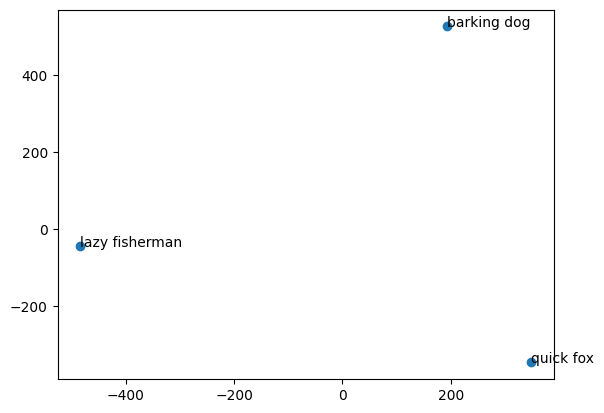

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(tsne_data[:, 0], tsne_data[:, 1])

for i, label in enumerate(["quick fox", "barking dog", "lazy fisherman"]):
    ax.annotate(label, (tsne_data[i, 0], tsne_data[i, 1]))

plt.show()

There are only three datapoints so it's hard to tell if the texts can be considered similar to each other or not. However, if we had many more texts, we might suspect that the data points would create some distinguishable groups, meaning the text are talking about similar topics.

## Datasets

We need more data for the final task. Luckily, there are many options for us to start with while learning. One option is to use the [HuggingFace](https://huggingface.co/docs/datasets/v1.8.0/loading_datasets.html) `datasets` module to download some texts we can work on.

Let's see what's inside.

In [30]:
import datasets

datasets.list_datasets()

<ipython-input-30-39ff2506cc88>:3: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  datasets.list_datasets()


['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookco

As you can see, there are many datasets we can work on. How to load them?

In [31]:
dataset = datasets.load_dataset('ag_news', split='train')
dataset

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Dataset ag_news downloaded and prepared to /root/.cache/huggingface/datasets/ag_news/default/0.0.0/bc2bcb40336ace1a0374767fc29bb0296cdaf8a6da7298436239c54d79180548. Subsequent calls will reuse this data.


Dataset({
    features: ['text', 'label'],
    num_rows: 120000
})

As we saw in the previous examples, the list of texts will be the easier structure to work on for now. Having the above dataset with `text` and `label` fields, we can create a list of texts with a simple comprehension.

In [32]:
large_texts = [item['text'] for item in dataset]
large_texts[:10]

["Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.",
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.',
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.",
 'Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\\flows from the main pipeline in southern Iraq after\\intelligence showed a rebel militia could strike\\infrastructure, an oil official said on Saturday.',
 'Oil prices soar to all-time record, posing new menace to US economy (A

## ⭐ A big 🗻 task for you ⭐

You have all the tools!

Collect large dataset of texts from *XXX* and:

1.   Prepare them for analysis, e.g.
  1. Tokenize them.
  1. Transform the tokens into lemmas (so the `dog` and the `dogs` are treated as the same feature).
2. Represent the texts as bag of words, remembering about stopwords. Experiment with the features count. If you find that there are features that influence the representation, go back to the step 1. and take it into consideration when preparing the data (maybe you want to get rid of numbers?).
3. Visualize the data on a plot (without labels for better performance). Can you distiguish some groups of texts? What these texts are about?
4. Detect named entites in groups representatives. Do named etities also suggest the topic of the text?


In [33]:

NUMBER_OF_TEXTS = 500
NUMBER_OF_FEATURES = 250

In [34]:

cleaned_texts = []
for doc in large_texts[:NUMBER_OF_TEXTS]:
  cleaned_doc = doc.lower()
  doc_model = nlp(cleaned_doc)
  cleaned_doc = ' '.join(token.lemma_ for token in doc_model if token.is_alpha and token.pos_ == 'NOUN')
  cleaned_texts.append(cleaned_doc)


In [35]:

large_count_vector = CountVectorizer(max_features=NUMBER_OF_FEATURES, stop_words='english')
large_data_count = large_count_vector.fit_transform(cleaned_texts)
large_count_vector.get_feature_names_out()


array(['access', 'ad', 'agency', 'air', 'apple', 'application', 'area',
       'article', 'astronaut', 'attack', 'auction', 'bank', 'bird', 'bit',
       'blog', 'bug', 'business', 'camera', 'campaign', 'car', 'care',
       'cargo', 'case', 'cause', 'cell', 'chairman', 'change', 'channel',
       'child', 'chip', 'city', 'climate', 'cloud', 'cluster', 'code',
       'comet', 'company', 'computer', 'concern', 'consumer', 'core',
       'cost', 'country', 'course', 'craigslist', 'customer', 'darfur',
       'date', 'datum', 'day', 'death', 'delay', 'destination',
       'developer', 'disc', 'dispute', 'dolphin', 'drug', 'dvd',
       'earning', 'earth', 'economy', 'edge', 'election', 'engine',
       'executive', 'expectation', 'expert', 'eye', 'face', 'fi',
       'fighter', 'firm', 'food', 'foot', 'force', 'forest', 'format',
       'forum', 'founder', 'freestyle', 'fuel', 'galaxy', 'game', 'gap',
       'gas', 'government', 'group', 'growth', 'hacker', 'hand', 'health',
       'hurri

In [36]:
large_tsne_model = TSNE(n_components=2)
large_tsne_data = tsne_model.fit_transform(large_data_count.toarray())

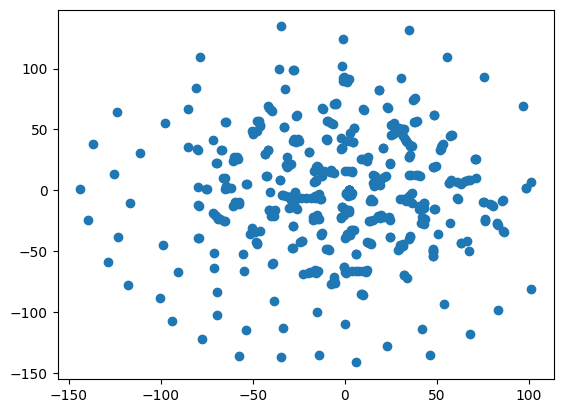

In [37]:
plt.scatter(large_tsne_data[:, 0], large_tsne_data[:, 1])
plt.show()